In [2]:
#import the liabraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [5]:
#Collect and clean the data
df = pd.read_csv("C:/Users/Debasish Ray/Desktop/stock/StockPredictor/Amal Test/new version/Google_train_data.csv")
df = df.dropna()

#Look at the data
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
df.select_dtypes(include=["object"]).columns

Index(['Date', 'Close', 'Volume'], dtype='object')

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.dropna(subset=["Close"])
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1149 non-null   float64       
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 59.1+ KB


(array([14975., 15340., 15706., 16071., 16436., 16801., 17167.]),
 [Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017')])

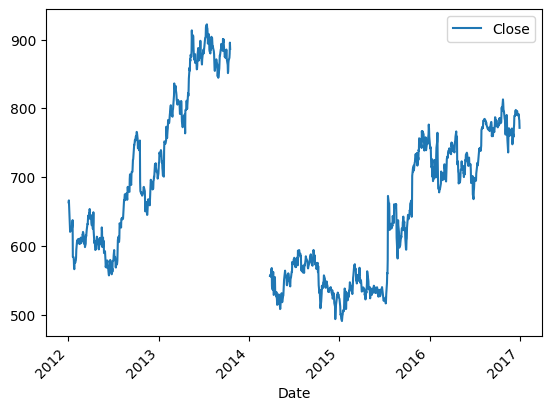

In [10]:
df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

In [11]:
df


,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"


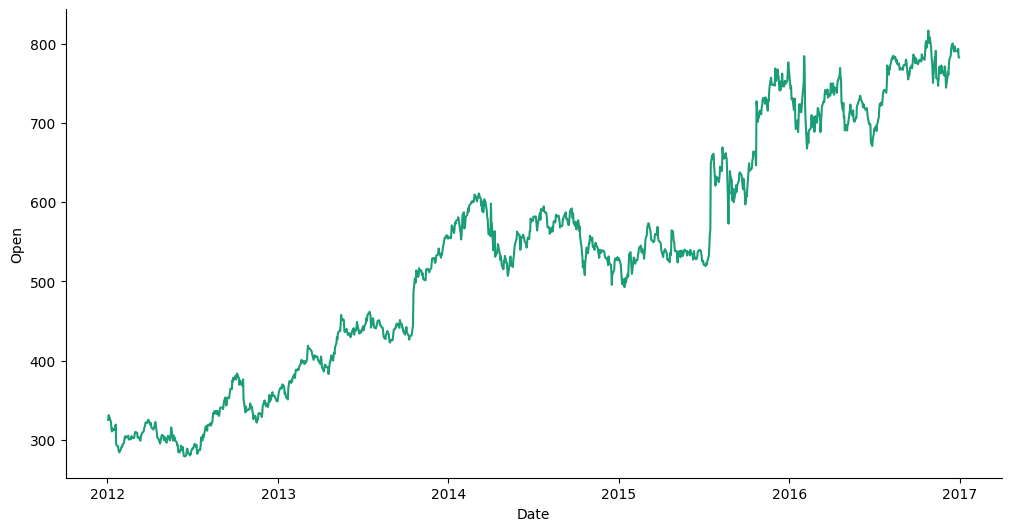

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

In [14]:
#create the model
model = RandomForestRegressor()

In [15]:

df['Close'] = df['Close'].astype(str)



In [16]:
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]

In [17]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)


C:\Users\Debasish Ray\AppData\Local\Temp\ipykernel_7988\216205325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = df['Close'].str.replace(',', '').astype(float)


In [18]:
df['Close'] = df['Close'].astype(float)

C:\Users\Debasish Ray\AppData\Local\Temp\ipykernel_7988\1762427929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = df['Close'].astype(float)


In [19]:
# Train the model
X = df[['Open', 'High', 'Low']]
X = X[:int(len(df)-1)]
y = df['Close']
y=y[:int(len(df)-1)]
model.fit(X,y) #Training the model

RandomForestRegressor()

In [20]:
#Test the model
predictions = model.predict(X)
print('The model score is:', model.score(X,y))

The model score is: 0.9997822245627577


In [21]:
#Make the predictions
new_data = df [['Open', 'High', 'Low']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:', prediction)
print('Actual value is:', df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [774.7251]
Actual value is: 771.82
